# Linear Regression from scratch
by Tanat Metmaolee

## Import

Can only use pandas, matplotlib and NumPy (optional)

In [7]:
import pandas as pd
# Optional
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For Dataset & Train, Test
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Datasets

In [8]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('iamsouravbanerjee/house-rent-prediction-dataset', path='./datasets', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset


## Hyperparameters
- `w` = Weight
- `b` = Bias
- `L` = Learning Rate
- `epochs` = Number of epochs

In [9]:
w = 0
b = 0
L = 0.0001
epochs = 1000

## Linear Regression Class

$f(x) = wx + b$
1. Initalize Hyperparameters
2. Calculate Loss function
3. Use Gradient Descent along with Early Stopping
4. Adjust W and B to minimize the loss
5. Visualize the graph using Pyplot

In [21]:
class LinearRegression:

    def __init__(self, learning_rate, epochs, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.torelance = tolerance
        self.w = []
        self.b = 0
        
    def _initialize_parameters(self, n_features: int):
        """
        Initialize function for models with more than 1 feature
        
        Args:
            n_features (int): number of features.
        """
        self.w = [0] * n_features
        
    # Prediction
    def predict(self, X):
        """
        Forward Propagation
        
        Args:
            X (list): List of feature

        Returns:
            prediction: List of prediction values.
        """
        predictions = [sum(self.w[j] * x[j] for j in range(len(self.w))) + self.b for x in X]
        
        return predictions
        
    def _cost_function(self, X, y):
        """
        MSE
        
        Args:
            X (list): List of feature values
            y (list): List of Output values

        Returns:
            float: Mean Squared Error
        """
        predictions = self.predict(X)
        n = len(y)
        square_loss = sum((y[i] - predictions[i]) ** 2 for i in range(n))
        
        return square_loss / n
    
    def _back_propagation(self, X, y):
        """
        Back Propagation function used for calculating gradient

        Args:
            X (list): List of feature values
            y (list): List of Output values

        Returns:
            float, float: Derivative of Weight and Bias
        """
        n_samples = len(y)
        n_features = len(X[0])
        predictions = self.predict(X)
        
        dw, db = [0] * n_features, 0
        
        for i in range(n_samples):
            error = y[i] - predictions[i]
            for j in range(n_features):
                dw[j] += - (2 / n_samples) * error * X[i][j]
            db += - (2 / n_samples) * error
        
        return dw, db
    
    def _gradient_descent(self, X, y, epochs):
        """
        Gradient Descent Technique

        Args:
            dw (float): Derivative of Weight
            db (float): Derivative of Bias
            L (float): Learning Rate
        """
        
        previous_loss = float("inf")
        
        for epoch in range(epochs):
            dw, db = self._back_propagation(X, y)
            
            self.w = [self.w[j] - self.learning_rate * dw[j] for j in range(len(self.w))]
            self.b -= self.learning_rate * db
            
            current_loss = self._cost_function(X, y)
            
            if abs(previous_loss - current_loss) < self.torelance:
                print(f"Early Stopping done at epoch: {epoch}.")
                break
            
            previous_loss = current_loss
    
    def fit(self, X, y):
        """_summary_

        Args:
            X (_type_): _description_
            y (_type_): _description_

        Returns:
            _type_: _description_
        """
        n_features = len(X[0])
        self._initialize_parameters(n_features)
        
        self._gradient_descent(X, y, self.epochs)
        
        return self

## MAIN

### Import Dataset

We're gonna test the model with in-built dataset first, 

so we don't have to deal with data cleaning and preprocessing

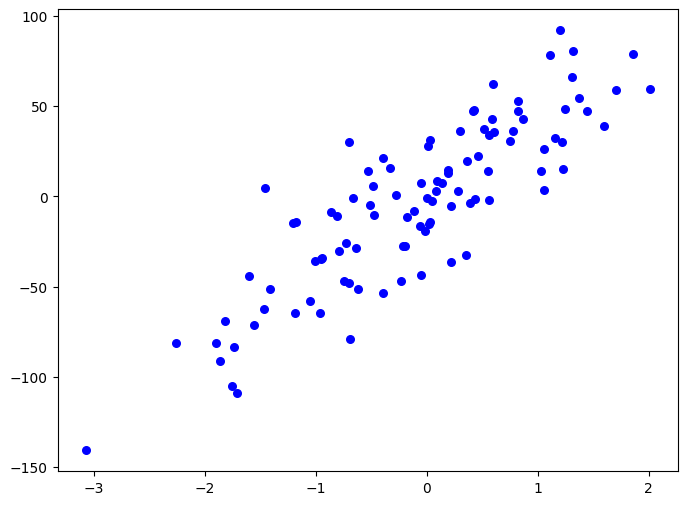

In [11]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=44)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

In [12]:
type(X)

numpy.ndarray

In [22]:
reg = LinearRegression(learning_rate=0.01, epochs=1000)
reg.fit(X,y)

Early Stopping done at epoch: 462.


In [14]:
# fig = plt.figure(figsize=(8,6))
# plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
# plt.plot(X, y_pred, color='black', label='Prediction')
# plt.show()